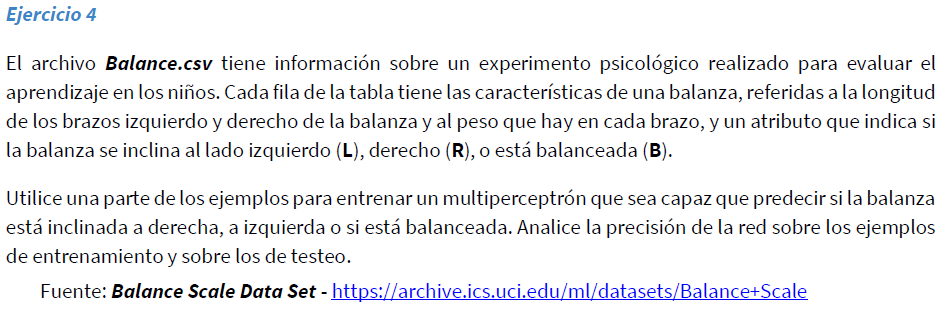

In [7]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

   Balance  LeftWeight  LeftDist  RightWeight  RightDist
0        B           1         1            1          1
1        R           1         1            1          2
2        R           1         1            1          3
3        R           1         1            1          4
4        R           1         1            1          5
5        R           1         1            2          1
6        R           1         1            2          2
7        R           1         1            2          3
8        R           1         1            2          4
9        R           1         1            2          5
10       R           1         1            3          1
11       R           1         1            3          2


<Axes: >

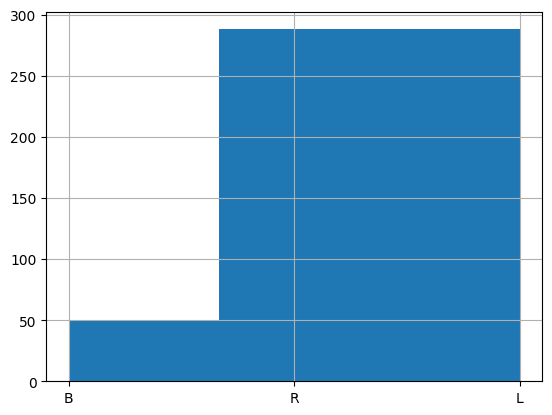

In [8]:
import chardet
import pandas as pd      # para trabajar con archivos de datos csv, excel
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt


nombre_archivo = DATOS_DIR + 'Balance.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

# Para hacer una inspección rápida de los datos
print(df.head(12))
#display(df)

#print(df.describe())
df['Balance'].hist(bins=3)

In [12]:
df.Balance.unique()

array(['B', 'R', 'L'], dtype=object)

## Seleccion de atributos y target

In [13]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_raw = np.array(df.iloc[:,1])    # recupera solo la primera columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_raw)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )

Las clases del dataset son : [1 2 3 4 5]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]

Datos de Entrenamiento: 437   Datos de Testeo: 188


## Entrenamiento y evaluacion del modelo

In [29]:
modelo = MLPClassifier(
    hidden_layer_sizes=(4),
    tol=1.0e-4,
    activation='relu',          # aguante relu, sklearn no tiene leaky relu
    solver='adam',              # todavía no vimos esto, pero el profe lo puso
    alpha=0.005,
    max_iter=2500,                        
).fit(X_train, Y_train)

#LO MALO ES QUE LE PONEMOS LA MISMA FUNCIÓN DE ACTIVACIÓN PARA TODAS LAS CAPAS, COSA QUE NO PASA CON TENSOR FLOW

#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )

Efectividad: 100.00%
      Score:   1.00


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluo con datos de testeo

In [30]:
#  ########### Medición del testeo ######################
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )

print(Y_it)
print(Y_pred_it)

Efectividad: 100.00%
      Score:   1.00
[1 3 1 1 2 3 1 2 1 4 5 4 2 1 1 2 3 2 2 5 1 2 1 1 5 3 3 3 1 2 5 3 1 3 2 5 5
 2 5 2 4 1 5 5 1 4 4 5 2 1 1 5 4 1 1 2 1 4 2 1 2 5 3 5 2 4 2 5 1 3 1 5 3 5
 5 4 5 4 2 3 5 3 2 5 1 1 5 3 1 5 2 5 1 4 5 2 3 3 4 4 3 3 5 2 4 2 1 4 2 1 1
 2 2 1 4 2 1 5 3 3 3 4 4 3 2 5 2 4 4 2 3 2 3 1 3 1 3 2 2 4 3 3 5 3 3 2 5 2
 5 1 4 3 5 1 5 1 2 4 4 3 5 5 2 1 3 4 3 3 5 1 3 4 5 4 2 5 4 4 2 5 1 5 1 2 1
 3 5 4]
[1 3 1 1 2 3 1 2 1 4 5 4 2 1 1 2 3 2 2 5 1 2 1 1 5 3 3 3 1 2 5 3 1 3 2 5 5
 2 5 2 4 1 5 5 1 4 4 5 2 1 1 5 4 1 1 2 1 4 2 1 2 5 3 5 2 4 2 5 1 3 1 5 3 5
 5 4 5 4 2 3 5 3 2 5 1 1 5 3 1 5 2 5 1 4 5 2 3 3 4 4 3 3 5 2 4 2 1 4 2 1 1
 2 2 1 4 2 1 5 3 3 3 4 4 3 2 5 2 4 4 2 3 2 3 1 3 1 3 2 2 4 3 3 5 3 3 2 5 2
 5 1 4 3 5 1 5 1 2 4 4 3 5 5 2 1 3 4 3 3 5 1 3 4 5 4 2 5 4 4 2 5 1 5 1 2 1
 3 5 4]
